In [1]:
import re
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('Desktop/NLP Projects/Twitter Sentiment Analysis/train.csv')
test = pd.read_csv('Desktop/NLP Projects/Twitter Sentiment Analysis/test.csv')

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
test.id

0        31963
1        31964
2        31965
3        31966
4        31967
5        31968
6        31969
7        31970
8        31971
9        31972
10       31973
11       31974
12       31975
13       31976
14       31977
15       31978
16       31979
17       31980
18       31981
19       31982
20       31983
21       31984
22       31985
23       31986
24       31987
25       31988
26       31989
27       31990
28       31991
29       31992
         ...  
17167    49130
17168    49131
17169    49132
17170    49133
17171    49134
17172    49135
17173    49136
17174    49137
17175    49138
17176    49139
17177    49140
17178    49141
17179    49142
17180    49143
17181    49144
17182    49145
17183    49146
17184    49147
17185    49148
17186    49149
17187    49150
17188    49151
17189    49152
17190    49153
17191    49154
17192    49155
17193    49156
17194    49157
17195    49158
17196    49159
Name: id, Length: 17197, dtype: int64

In [5]:
print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [6]:
#label 0
lab_0 = train[train.label == 0]
#label 1
lab_1 = train[train.label == 1]

In [7]:
# No sexist/racist comment
lab_0.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [8]:
# Racist/ sexist tweet  # #@!user
lab_1.head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


In [9]:
train.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

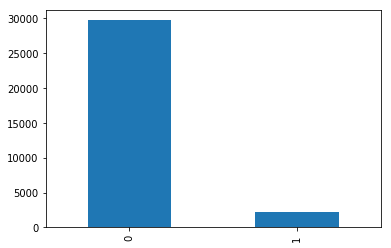

In [10]:
train.label.value_counts().plot(kind = 'bar')

In [11]:
len_train = train.tweet.apply(lambda x: len(str(x)))
len_test = test.tweet.apply(lambda x: len(str(x)))

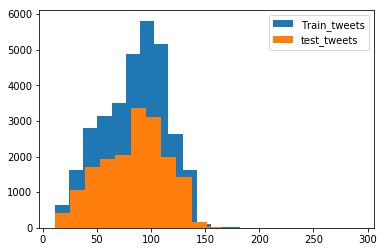

In [12]:
plt.hist(len_train, bins = 20, label = 'Train_tweets')
plt.hist(len_test, bins = 20, label = 'test_tweets')
plt.legend()
plt.show()

# Data Cleaning

In [13]:
# Combine train and test datasets to make it conveninent to preprocess the data.
combined = train.append(test, ignore_index=True) 

In [14]:
# User-defined function to remove unwanted text patterns from tweets
def remove_pattern(input_text, pattern):
    r = re.findall(pattern, input_text)
    
    for i in r:
        input_text = re.sub(i, '', input_text)
        
    return input_text

## Removing twitter handles

In [15]:
combined['clean_tweet'] = combined['tweet'].apply(lambda x: remove_pattern(x, r'@[\w]+'))
combined.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


## Removing numbers, punctuations and special characters 

In [16]:
combined['clean_tweet'] = combined['clean_tweet'].str.replace('[^a-zA-Z#]', ' ')
combined.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


## Removing short words and stopwords

In [17]:
from nltk.corpus import stopwords
sw = set(stopwords.words('english'))
sw

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [18]:
sw -= {'no','not','against','aren\'t','couldn\'t','didn\'t','doesn\'t','don\'t','hadn\'t','hasn\'t','haven\'t','isn\'t','mightn\'t','mustn\'t','needn\'t','wasn\'t','weren\'t','wouldn\'t'}

In [19]:
def remove_stopwords(stopwords,text):
    text = [i for i in text.split() if i not in stopwords]
    return ' '.join(text)

In [20]:
combined['clean_tweet'] = combined['clean_tweet'].apply(lambda x: remove_stopwords(sw,x))
combined.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit use cause offer wheelchair...
2,3,0.0,bihday your majesty,bihday majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love u take u time ur
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [21]:
# Removing short words like hmm, oh etc.
combined['clean_tweet'] = combined['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combined.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...
2,3,0.0,bihday your majesty,bihday majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


## Text Normalization and Stemming

In [22]:
from nltk.stem import PorterStemmer
PS = PorterStemmer()
combined['clean_tweet'] = combined['clean_tweet'].apply(lambda x: ' '.join([PS.stem(i) for i in x.split()]))
combined.clean_tweet.head()

0       father dysfunct selfish drag kid dysfunct #run
1    thank #lyft credit caus offer wheelchair van #...
2                                       bihday majesti
3                                #model love take time
4                             factsguid societi #motiv
Name: clean_tweet, dtype: object

In [23]:
!pip install wordcloud

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [24]:
all_words = ' '.join(text for text in combined['clean_tweet'])

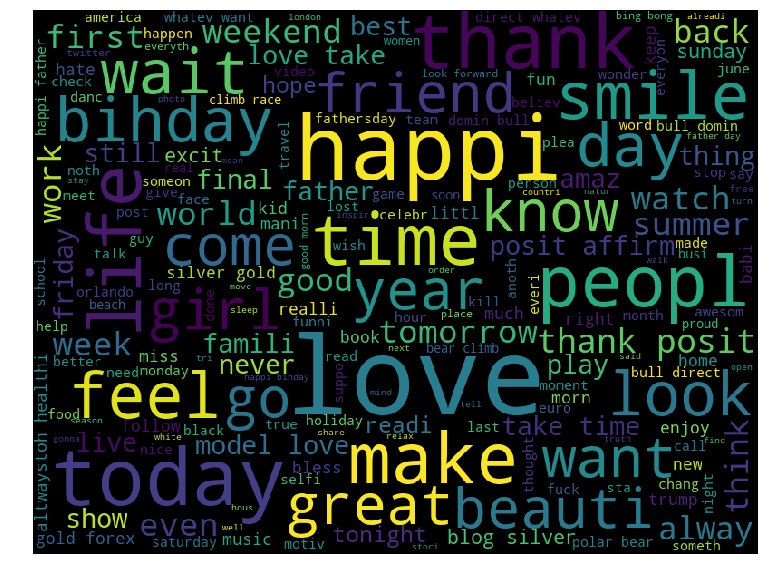

In [25]:
from wordcloud import WordCloud
wc = WordCloud(width = 800, height = 600, max_font_size = 120, random_state = 21).generate(all_words)
plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

## Plot separate wordcloud for both type of tweets:

### Non-racist comments

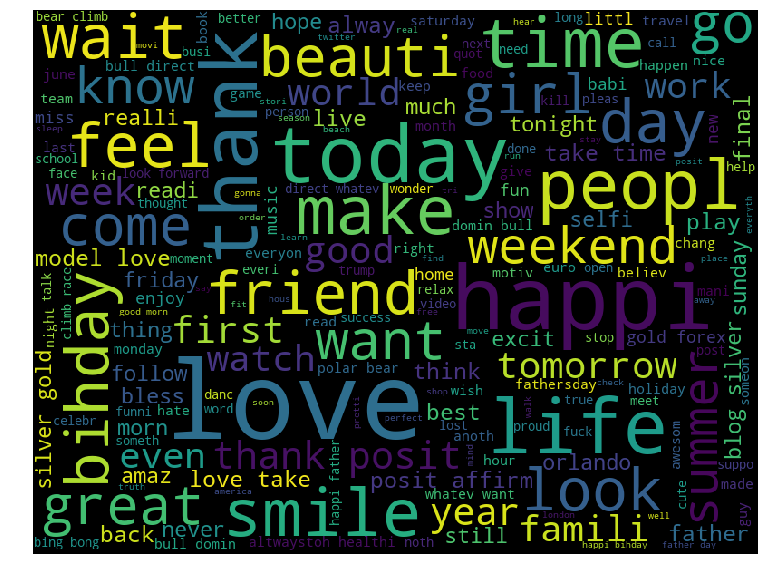

In [26]:
tweet_0 = (combined[combined.label == 0]).clean_tweet
wc_0 = ' '.join(text for text in tweet_0)
wc = WordCloud(width = 800, height = 600, max_font_size = 120, random_state = 5).generate(wc_0)
plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

### Racist/Sexist comments 

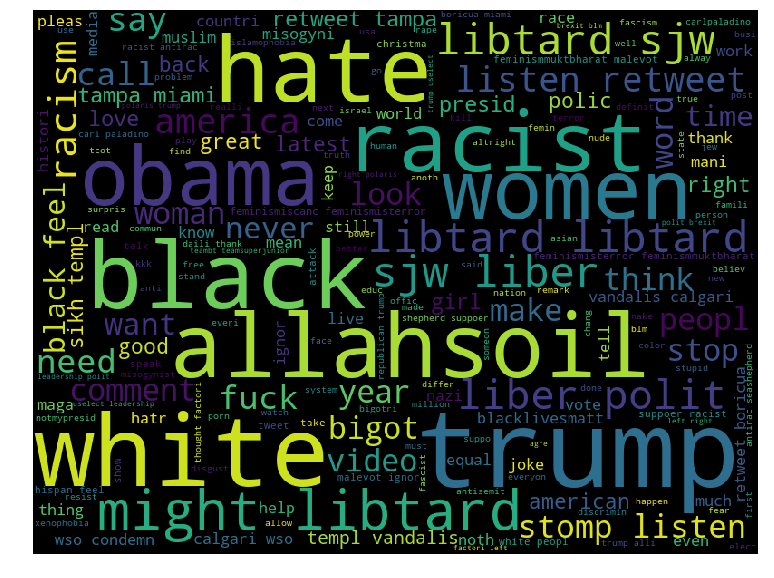

In [27]:
tweet_1 = (combined[combined.label == 1]).clean_tweet
wc_1 = ' '.join(text for text in tweet_1)
wc = WordCloud(width = 800, height = 600, max_font_size = 120, random_state = 5).generate(wc_1)
plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [28]:
def hashtag_extractor(x):
    init = ''
    for text in x:
        string = re.findall(r'#(\w+)', text)
        string =  (' '.join(ele for ele in string)) + ' '
        init += string
        
    all_hashtags = init
    all_hashtags = all_hashtags.split()   
    return all_hashtags

In [29]:
HT_positive = hashtag_extractor((combined[combined.label == 0]).clean_tweet)

In [30]:
HT_negative = hashtag_extractor((combined[combined.label == 1]).clean_tweet)

In [31]:
combined.shape

(49159, 4)

In [32]:
len(HT_positive)

68425

In [33]:
len(HT_negative)

4616

In [34]:
from nltk import FreqDist

### Visualize regular tweets

In [35]:
data = FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag':list(data.keys()),'Count':list(data.values())})

In [36]:
d = d.nlargest(20,columns='Count')

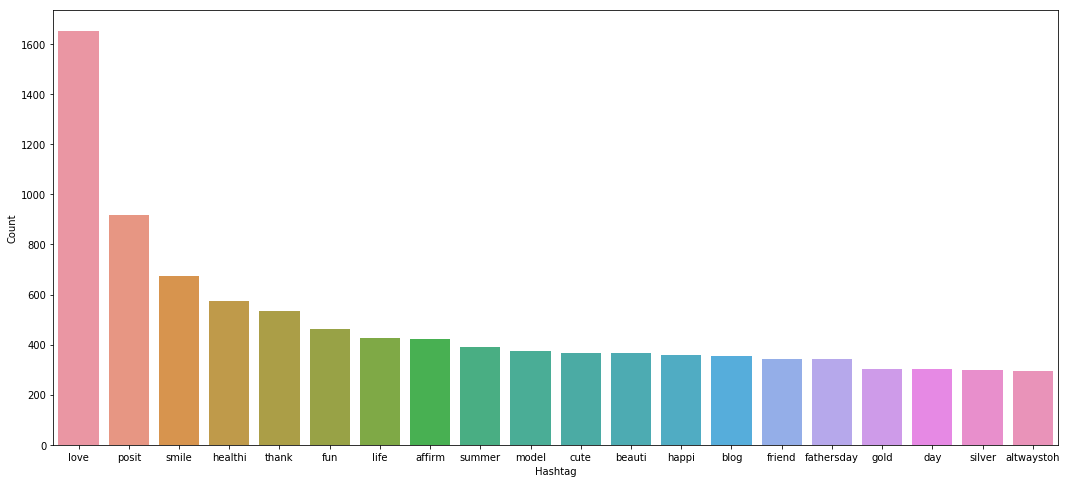

In [37]:
plt.figure(figsize=(18,8))
fig = sns.barplot(data=d, x='Hashtag', y='Count')
fig.set(ylabel = 'Count')
plt.show()

In [38]:
data = FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag':list(data.keys()),'Count':list(data.values())})

In [39]:
d = d.nlargest(20,columns='Count')

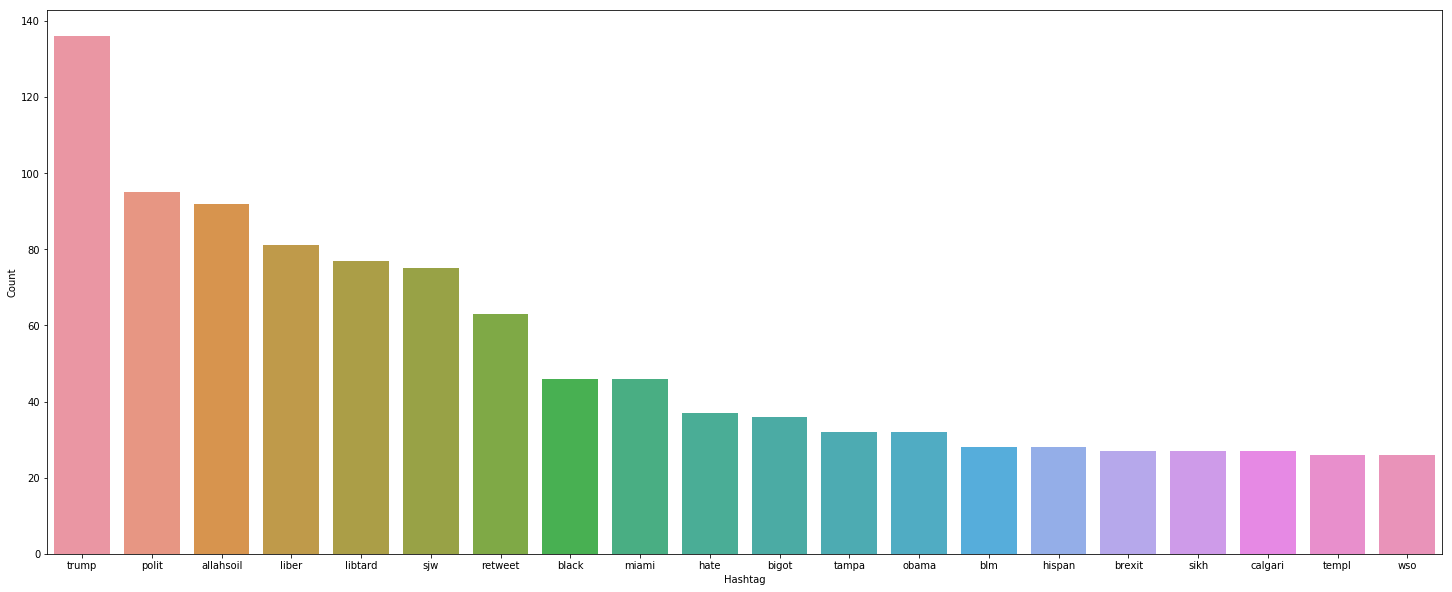

In [40]:
plt.figure(figsize=(25,10))
fig = sns.barplot(data=d, x='Hashtag', y='Count')
fig.set(ylabel = 'Count')
plt.show()

In [41]:
## Overall of 46419 unique words

from collections import Counter
len(Counter(all_words.split()).keys())

46419

In [292]:
!python -m pip install --upgrade pip

Requirement already up-to-date: pip in c:\users\asus\appdata\roaming\python\python37\site-packages (20.2.2)


In [293]:
!pip install --user gensim

  Using cached gensim-3.8.3-cp37-cp37m-win_amd64.whl (24.2 MB)
  Using cached Cython-0.29.14-cp37-cp37m-win_amd64.whl (1.7 MB)


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [42]:
import gensim

In [43]:
# Count Vectorizer 

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
bow_vectorizer = CountVectorizer(min_df=2, max_df=0.9, max_features=1000)
bow = bow_vectorizer.fit_transform(combined['clean_tweet'])
bow.shape

(49159, 1000)

In [44]:
# Tfidf Vectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=2, max_df=0.9, max_features=1000)
tfidf = tfidf_vectorizer.fit_transform(combined['clean_tweet'])
tfidf.shape

(49159, 1000)

# Word2Vec feature Embedding

In [45]:
from gensim.models import Word2Vec

In [46]:
tokenized_tweet = combined['clean_tweet'].apply(lambda x: x.split())
model_w2v = Word2Vec(tokenized_tweet, 
                     size = 200, # desired no. of features
                     window = 5, # context window size 
                     negative = 10, sg=1, hs=0, workers = 3, seed=34)                     

In [47]:
model_w2v.train(tokenized_tweet, total_examples=len(tokenized_tweet), epochs=20)

(5257427, 6605240)

In [48]:
model_w2v.wv.most_similar('trump')

[('donald', 0.5431370139122009),
 ('#republican', 0.5143345594406128),
 ('#deplor', 0.5035802721977234),
 ('presidenti', 0.49870026111602783),
 ('putin', 0.49181851744651794),
 ('endors', 0.48773372173309326),
 ('unfit', 0.48619648814201355),
 ('teleprompt', 0.47818002104759216),
 ('#neverump', 0.4742407500743866),
 ('#donthecon', 0.4739041328430176)]

## Preparing vectors for tweets 

In [49]:
model_w2v.wv.word_vec('trump')  # 200 features in each word

array([ 0.11028915, -0.20609164,  0.26679966, -0.04277458, -0.2833189 ,
       -0.41947523,  0.34822214, -0.36570543, -0.81082433, -0.23005792,
       -0.738004  , -0.00955878, -0.5444989 ,  0.5156037 , -0.28097385,
       -0.30369726,  0.18285239, -0.1394486 ,  0.15634462, -0.22022083,
        0.32721868, -0.10375981,  0.48994696, -0.03306838,  0.31770244,
       -0.58459216, -0.18091461,  0.19176933,  0.12906204, -0.15815282,
       -0.1601378 , -0.25907072, -0.01967577,  0.21892832,  0.37089103,
       -0.6048918 , -0.82946014, -0.24890798, -0.376707  ,  0.2739887 ,
        0.49841252, -0.6096448 ,  0.6011132 , -0.07665665, -0.6502192 ,
       -0.05205034,  0.19392599,  0.12877901, -0.19346829,  0.06368291,
       -0.42137802, -0.0908804 , -0.2784638 ,  0.06474187,  0.25134552,
       -0.03627171,  0.21344766,  0.00852266,  0.40788558, -0.11176299,
       -0.89613366, -0.12831819,  0.30164647, -0.22478668,  0.28806186,
       -0.67978626,  0.30866307,  0.38543776,  0.4306089 , -0.35

In [50]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1,size))
    count = 0
    for word in tokens:
        try:
            vec+= model_w2v[word].reshape((1,size))
            count+=1
            
        except KeyError: # handling the case where the token is not in vocabulary
            continue
    
    if count!=0:
        vec/=count
    
    return vec

#Preparing word2vec feature set
wordvec_arrays = np.zeros((len(tokenized_tweet),200))
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i],200)
    wordvec_df = pd.DataFrame(wordvec_arrays)

In [51]:
wordvec_df.shape

(49159, 200)

# Model building and evaluation 
### 1. Logistic Regression
### 2. SVM
### 3. XGBoost
### 4. Fine tuning Word2Vec+XGBoost

## Logistic regression model

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

# BOW 

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow,train['label'], test_size = 0.3, random_state = 42)
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain)
predict = lreg.predict_proba(xvalid_bow)
predict_int = predict[:,1] >= 0.3   # if prediction is greater than or eual to 0.3 than 1, else 0
predict_int = predict_int.astype('int')

print('Logistic regression model f1 score over BOW feature vector : ', f1_score(yvalid, predict_int))

# Make predictions for test dataset and create submission file
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3  
test_pred_int = test_pred_int.astype('int')
submission = pd.DataFrame({'id':test['id'], 'label':test_pred_int})
submission.to_csv('lreg_bow.csv', index = False)



# TFIDF Vector

train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(train_tfidf,train['label'], test_size = 0.3, random_state = 42)
lreg = LogisticRegression()
lreg.fit(xtrain_tfidf, ytrain)
predict = lreg.predict_proba(xvalid_tfidf)
predict_int = predict[:,1] >= 0.3   # if prediction is greater than or eual to 0.3 than 1, else 0
predict_int = predict_int.astype('int')

print('Logistic regression model f1 score over TFIDF feature vector : ', f1_score(yvalid, predict_int))

# Make predictions for test dataset and create submission file
test_pred = lreg.predict_proba(test_tfidf)
test_pred_int = test_pred[:,1] >= 0.3  
test_pred_int = test_pred_int.astype('int')
submission = pd.DataFrame({'id':test['id'], 'label':test_pred_int})
submission.to_csv('lreg_tfidf.csv', index = False)



# Word2Vec Features

train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]

xtrain_w2v, xvalid_w2v, ytrain, yvalid = train_test_split(train_w2v,train['label'], test_size = 0.3, random_state = 42)
lreg = LogisticRegression()
lreg.fit(xtrain_w2v, ytrain)
predict = lreg.predict_proba(xvalid_w2v)
predict_int = predict[:,1] >= 0.3   # if prediction is greater than or eual to 0.3 than 1, else 0
predict_int = predict_int.astype('int')

print('Logistic regression model f1 score over W2V feature vector : ', f1_score(yvalid, predict_int))

# Make predictions for test dataset and create submission file
test_pred = lreg.predict_proba(test_w2v)
test_pred_int = test_pred[:,1] >= 0.3  
test_pred_int = test_pred_int.astype('int')
submission = pd.DataFrame({'id':test['id'], 'label':test_pred_int})
submission.to_csv('lreg_w2v.csv', index = False)

Logistic regression model f1 score over BOW feature vector :  0.5392320534223706
Logistic regression model f1 score over TFIDF feature vector :  0.5421052631578948
Logistic regression model f1 score over W2V feature vector :  0.6109467455621301


## SVM model

In [53]:
from sklearn import svm

# BOW
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow,ytrain)
predict = svc.predict_proba(xvalid_bow)
predict_int = predict[:,1]>=0.3
predict_int = predict_int.astype('int')

print('SVM model f1 score over BOW feature vector : ', f1_score(yvalid, predict_int))

# Make predictions for test dataset and create submission file
test_pred = svc.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3  
test_pred_int = test_pred_int.astype('int')
submission = pd.DataFrame({'id':test['id'], 'label':test_pred_int})
submission.to_csv('svm_bow.csv', index = False)



# TFIDF
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf,ytrain)
predict = svc.predict_proba(xvalid_tfidf)
predict_int = predict[:,1]>=0.3
predict_int = predict_int.astype('int')

print('SVM model f1 score over tfidf feature vector : ', f1_score(yvalid, predict_int))

# Make predictions for test dataset and create submission file
test_pred = svc.predict_proba(test_tfidf)
test_pred_int = test_pred[:,1] >= 0.3  
test_pred_int = test_pred_int.astype('int')
submission = pd.DataFrame({'id':test['id'], 'label':test_pred_int})
submission.to_csv('svm_tfidf.csv', index = False)



# WORD2VEC Feature 
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v,ytrain)
predict = svc.predict_proba(xvalid_w2v)
predict_int = predict[:,1]>=0.3
predict_int = predict_int.astype('int')

print('SVM model f1 score over Word2Vec feature vector : ', f1_score(yvalid, predict_int))

# Make predictions for test dataset and create submission file
test_pred = svc.predict_proba(test_w2v)
test_pred_int = test_pred[:,1] >= 0.3  
test_pred_int = test_pred_int.astype('int')
submission = pd.DataFrame({'id':test['id'], 'label':test_pred_int})
submission.to_csv('svm_w2v.csv', index = False)

SVM model f1 score over BOW feature vector :  0.5088207985143919
SVM model f1 score over tfidf feature vector :  0.5068618481244281
SVM model f1 score over Word2Vec feature vector :  0.6092404072043852


## XG Boost Model

In [403]:
!pip install xgboost

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [54]:
from xgboost import XGBClassifier

In [55]:
# BOW
xgb_model = XGBClassifier(max_depth = 6, n_estimators = 1000).fit(xtrain_bow,ytrain)
predict = xgb_model.predict(xvalid_bow)
print('xgb model f1 score over BOW feature vector : ', f1_score(yvalid, predict))

# Make predictions for test dataset and create submission file
test_pred = xgb_model.predict(test_bow)

submission = pd.DataFrame({'id':test['id'], 'label':test_pred})
submission.to_csv('xgb_bow.csv', index = False)



# TFIDF
xgb_model = XGBClassifier(max_depth = 6, n_estimators = 1000).fit(xtrain_tfidf,ytrain)
predict = xgb_model.predict(xvalid_tfidf)
print('xgboost model f1 score over tfidf feature vector : ', f1_score(yvalid, predict))

# Make predictions for test dataset and create submission file
test_pred = xgb_model.predict(test_tfidf)

submission = pd.DataFrame({'id':test['id'], 'label':test_pred})
submission.to_csv('xgboost_tfidf.csv', index = False)



# WORD2VEC Feature 
xgb_model = XGBClassifier(max_depth = 6, n_estimators = 1000).fit(xtrain_w2v,ytrain)
predict = xgb_model.predict(xvalid_w2v)
print('xgboost model f1 score over Word2Vec feature vector : ', f1_score(yvalid, predict))

# Make predictions for test dataset and create submission file
test_pred = xgb_model.predict(test_w2v)

submission = pd.DataFrame({'id':test['id'], 'label':test_pred})
submission.to_csv('xgboost_w2v.csv', index = False)

xgb model f1 score over BOW feature vector :  0.5333333333333334
xgboost model f1 score over tfidf feature vector :  0.549686660698299
xgboost model f1 score over Word2Vec feature vector :  0.6566637246248896


## Accuracy score 

In [56]:
print('The accuracy score of XGBoost model build over Word2Vec Feature vector : ', accuracy_score(yvalid,predict))

The accuracy score of XGBoost model build over Word2Vec Feature vector :  0.9594326832829283
